In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')

In [2]:
book=pd.read_csv('book (1).csv',encoding='cp1252')
book.head(30)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


### EDA:

In [3]:
book.shape

(10000, 4)

In [4]:
book.dtypes

Unnamed: 0      int64
User.ID         int64
Book.Title     object
Book.Rating     int64
dtype: object

In [5]:
book.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

#### No null entries present in the dataset

In [6]:
book.describe(include='all')

,Unnamed: 0,User.ID,Book.Title,Book.Rating
count,10000.00000,10000.000000,10000,10000.00000
unique,NaN,NaN,9659,NaN
top,NaN,NaN,Fahrenheit 451,NaN
freq,NaN,NaN,5,NaN
mean,5000.50000,95321.249800,NaN,7.56630
std,2886.89568,117645.703609,NaN,1.82152
min,1.00000,8.000000,NaN,1.00000
25%,2500.75000,2103.000000,NaN,7.00000
50%,5000.50000,3757.000000,NaN,8.00000
75%,7500.25000,162052.000000,NaN,9.00000


### Fahrenheit 451 is the most picked book with frequency 5

In [7]:
book['Book.Title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book.Title, Length: 9659, dtype: int64

In [8]:
book['User.ID'].nunique()

2182

In [9]:
book['Book.Title'].nunique()

9659

#### There are 9659 unique books in the list

In [10]:
book['Book.Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [11]:
book.rename(columns={'User.ID' : 'User_ID'},inplace=True)
book

,Unnamed: 0,User_ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


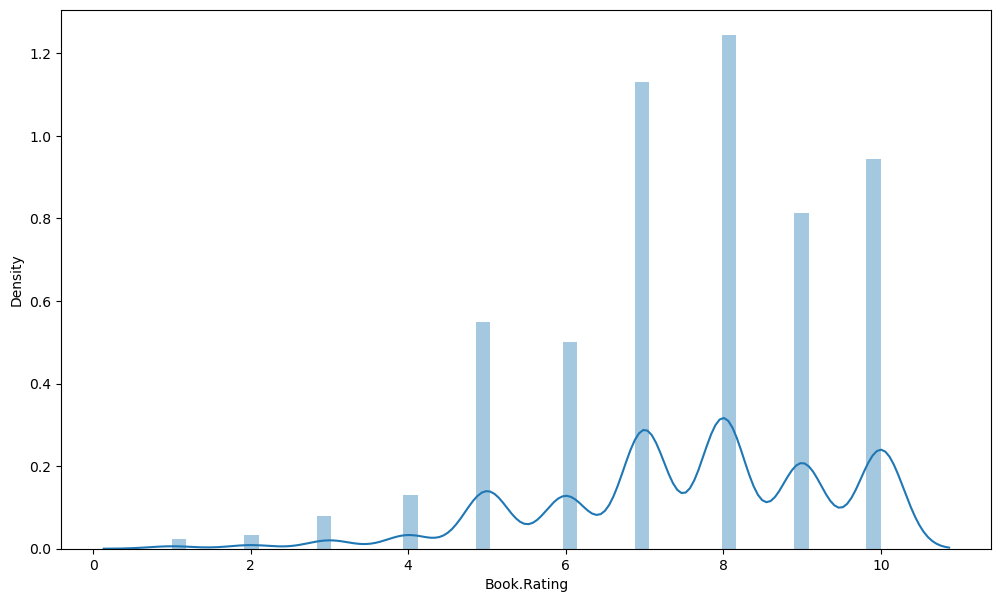

In [12]:
plt.figure(figsize=(12,7))
sns.distplot(book['Book.Rating'])
plt.show()

### Collaborative Filetring-UBCF(Cosine Similarity Score)
### Model Building || Data Mining

In [13]:
ubcf_data=pd.pivot_table(data=book,values='Book.Rating',index='User_ID',columns='Book.Title').fillna(0)
ubcf_data.index=book.User_ID.unique()
ubcf_data

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
cosine_distances=1-pairwise_distances(X=ubcf_data,metric='cosine')
cosine_df=pd.DataFrame(data=cosine_distances)
cosine_df.index=book.User_ID.unique()
cosine_df.columns=book.User_ID.unique()
cosine_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
first_500_users=cosine_df.iloc[:500,:500]
first_500_users

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,278364,278376,278378,278388,278389,278390,278396,278398,278401,278407
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
np.fill_diagonal(a = first_500_users.to_numpy(),val=0) 

In [17]:
first_500_users

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,278364,278376,278378,278388,278389,278390,278396,278398,278401,278407
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
first_500_users.idxmax()

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
278390    276726
278396    276726
278398    277988
278401    278246
278407    276726
Length: 500, dtype: int64

### Extracting books read by different users

In [19]:
book[(book['User_ID']==278398) | (book['User_ID']== 277988)]

,Unnamed: 0,User_ID,Book.Title,Book.Rating
1410,1411,277988,Shopgirl,10
1899,1900,278398,Managing Technology and Innovation for Competi...,8


In [20]:
book[(book['User_ID']==278407) | (book['User_ID']== 276726)]

,Unnamed: 0,User_ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1901,1902,278407,The Unofficial Guide to Having a Baby,10


In [21]:
book[(book['User_ID']==276729) | (book['User_ID']== 276726)]

,Unnamed: 0,User_ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6


In [22]:
book[(book['User_ID']==276790) | (book['User_ID']== 276726)]

,Unnamed: 0,User_ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5


In [23]:
book[(book['User_ID']==276736) | (book['User_ID']== 276726)]

,Unnamed: 0,User_ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [24]:
def get_recommendation(customer_id):
        
        tem=list(cosine_df.sort_values([customer_id],ascending=False).head(3).index)

        book_list=list(book[book['User_ID'].isin(tem)]['Book.Title'])

        recommended_books = set(book_list)-set(book[book['User_ID']==customer_id]['Book.Title'])
        
        return recommended_books

In [25]:
get_recommendation(276729)

{'A Man of Steel',
 'Classical Mythology',
 'The Apprentice',
 'The Seventh Night'}